In [ ]:
from google.colab import drive
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Señales

In [ ]:
voltaje = []
error_voltaje = []
tiempo = []
error_tiempo = []

for i in range(1,6):

    path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 3-9/cobre/en cero/{i}.csv"
    df= pd.read_csv(path, header=None, skiprows= 1)
    t = df[0]
    v = df[2]

    inicio = []

    for n in range(len(v)-1):
        if v[n] >= 0.1:
            inicio.append(n)
            break
    v_e = np.array([0.0015]*len(t[inicio[0]:])) #V
    t_e = np.array([10**(-10)*50]*len(t[inicio[0]:])) #s

    tiempo.append(t[inicio[0]:]-t[inicio[0]])
    voltaje.append(v[inicio[0]:])
    error_voltaje.append(v_e)
    error_tiempo.append(t_e)
    print(inicio)

[2632]
[3298]
[2479]
[2548]
[3587]


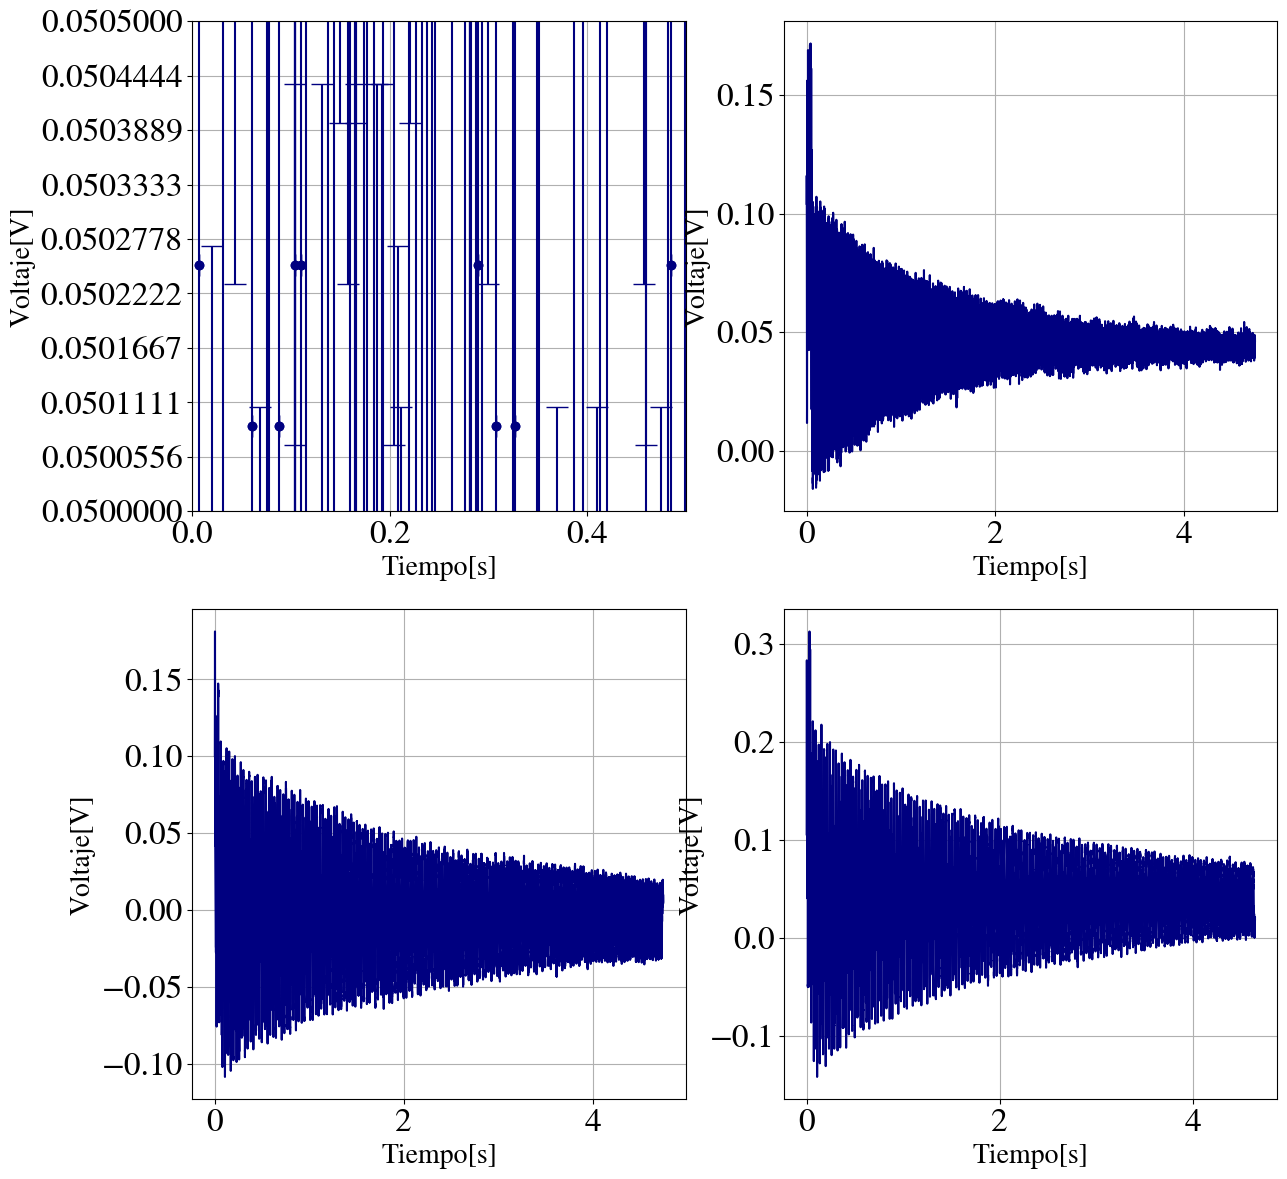

In [ ]:
fig, axs = plt.subplots(2,2, figsize= (14,14))
axs[0,0].plot(tiempo[1], voltaje[1], color = 'navy', label = 'Señal', marker = 'o', linestyle = '')
axs[0,0].errorbar(tiempo[1], voltaje[1], c = 'navy', label = 'Señal', fmt = 'o',yerr = error_voltaje[1], xerr = error_tiempo[1], capsize =8)
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].set_xlim(0,0.5)
axs[0,0].set_ylim(0.05,0.0505)
axs[0,0].set_yticks(np.linspace(0.05,0.0505, 10))
#axs[0,0].legend()

axs[0,1].plot(tiempo[2], voltaje[2], color = 'navy', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
#axs[0,1].legend()

axs[1,0].plot(tiempo[3], voltaje[3], color = 'navy', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
#axs[1,0].legend()

axs[1,1].plot(tiempo[4], voltaje[4], color = 'navy', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
#axs[1,1].legend()

plt.show()

In [ ]:
minimo_volt_detect = (0.050222- 0.051667)*3/2
minimo_volt_detect*10**(6)

-2167.4999999999923

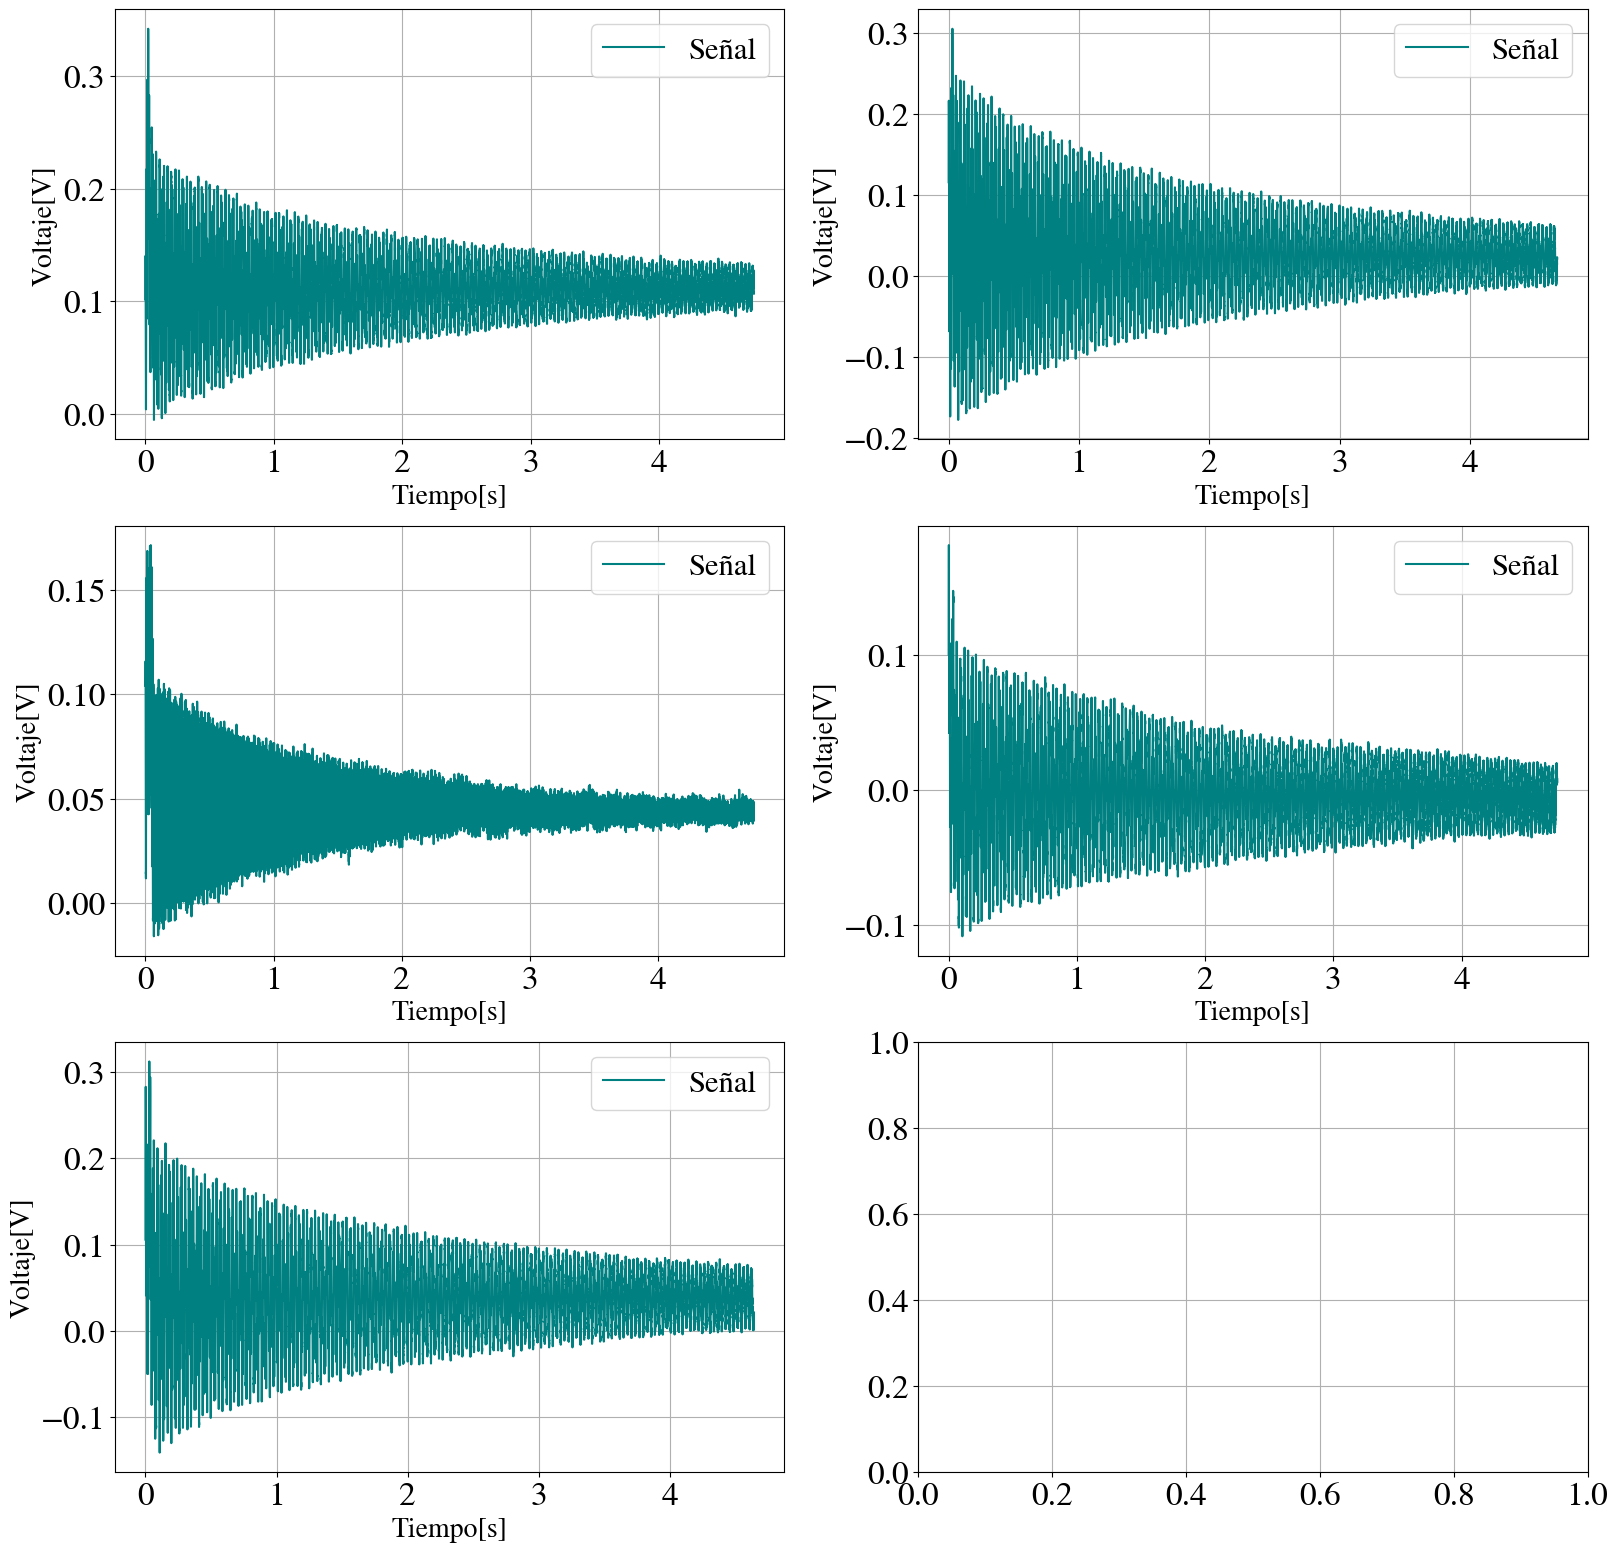

In [ ]:
#Grafico todo junto

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(tiempo[0], voltaje[0], color = 'teal', label = 'Señal')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].legend()


axs[0,1].plot(tiempo[1], voltaje[1], color = 'teal', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
axs[0,1].legend()

axs[1,0].plot(tiempo[2], voltaje[2], color = 'teal', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
axs[1,0].legend()

axs[1,1].plot(tiempo[3], voltaje[3], color = 'teal', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
axs[1,1].legend()

axs[2,0].plot(tiempo[4], voltaje[4], color = 'teal', label = 'Señal')
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Tiempo[s]')
axs[2,0].legend()

plt.show()

# Ruido

In [ ]:
ruta = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 3-9/cobre/cobre ruido.csv"
df= pd.read_csv(ruta, header=None, skiprows= 1)
tiempo_ruido = df[0]
voltaje_ruido = df[2]

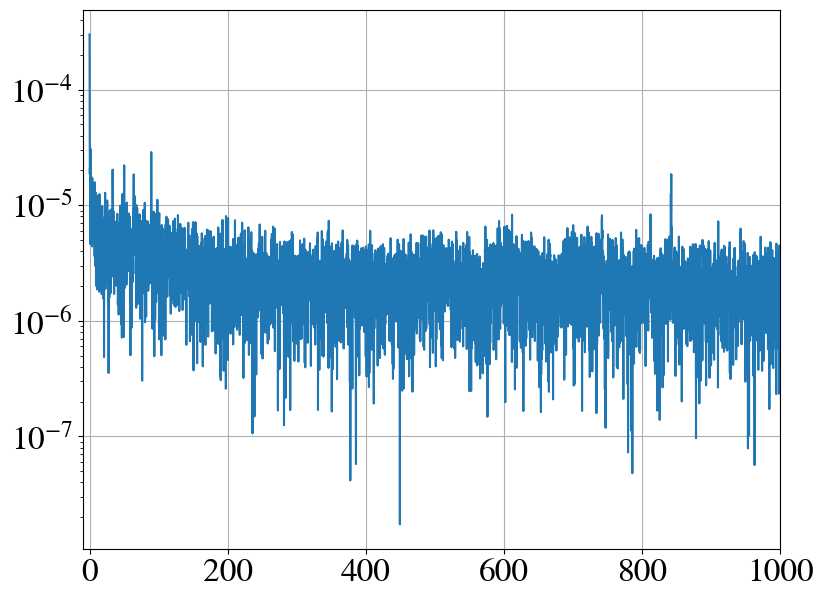

In [ ]:
frec_ruido = np.arange(0,6000, 1/5)
N_ruido = len(voltaje_ruido)

fft_ruido = np.fft.fft(voltaje_ruido)
fft2_ruido = 2.0/N_ruido * np.abs(fft_ruido)


plt.plot(frec_ruido[:N_ruido//2], fft2_ruido[:N_ruido//2])
plt.xlim(-10,1000)
plt.yscale('log')
plt.show()

#FFT

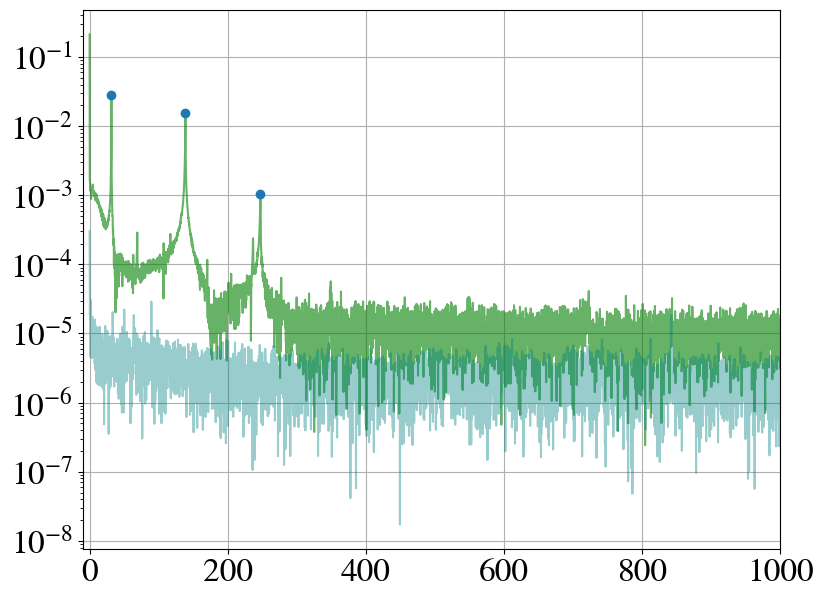

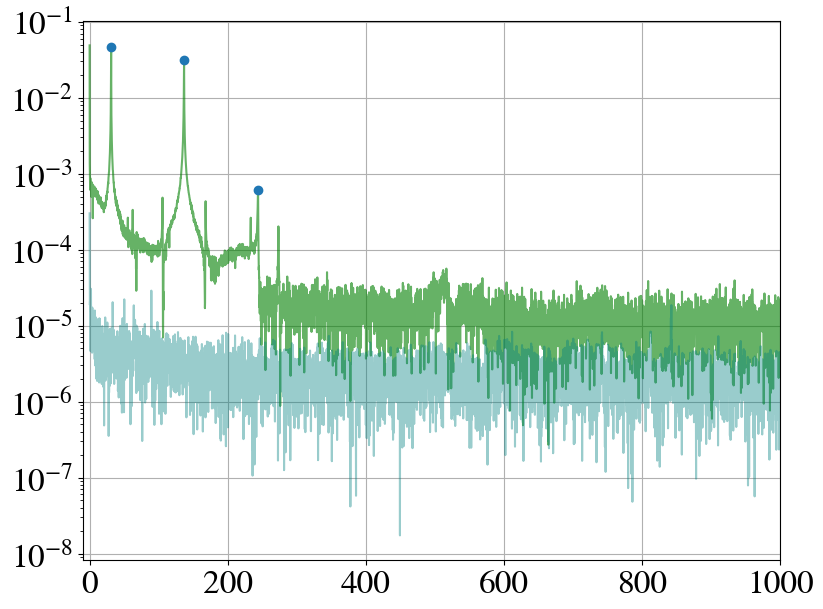

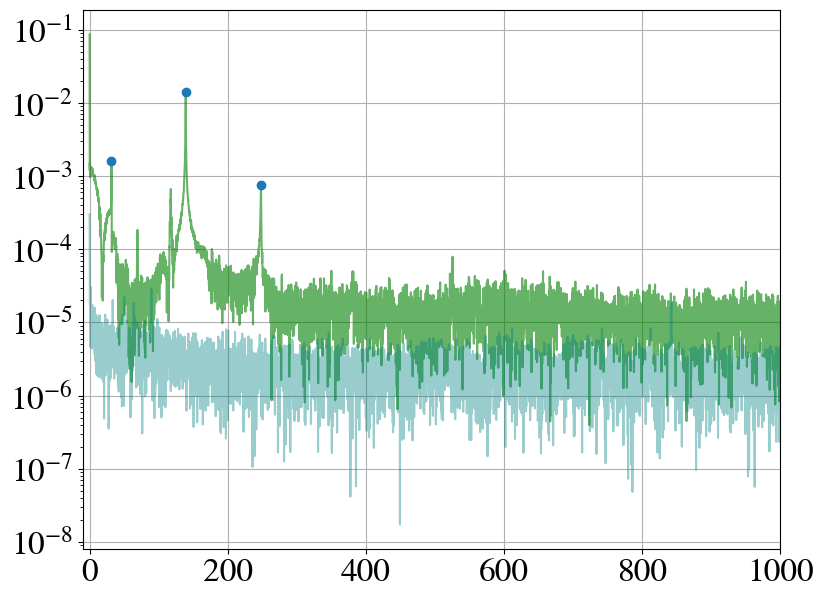

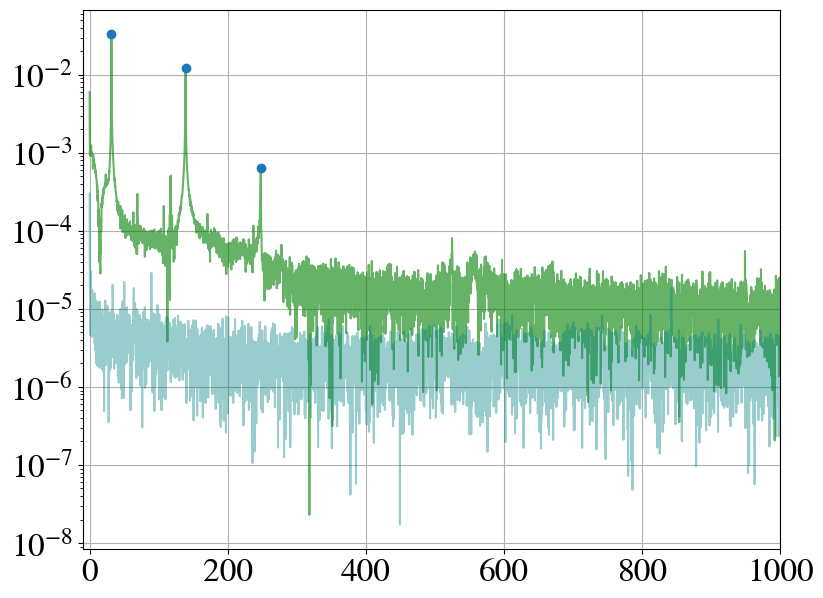

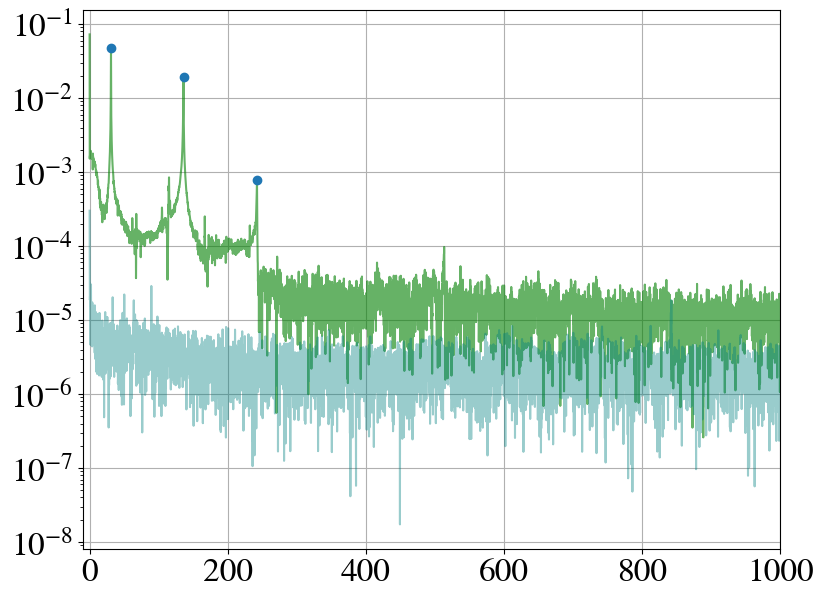

In [43]:
#calculo las tranformadas

N = 50000
frec_muestreo = 10000

# Calular el vector de frecuencias.
frec = np.arange(0,frec_muestreo,1/5)

fft = []
fft_picos =[]
picos = []
frec_picos = []

for i in range(5):
    fft1 = np.fft.fft(voltaje[i])
    fft2 = 2.0/N * np.abs(fft1)
    picos1, diccionario = find_peaks(fft2, threshold = 0.000005, distance = 500, height= 0.0005)

    plt.plot(frec[:N//2], fft2[:N//2], color = 'green', alpha = 0.6)
    plt.plot(frec[picos1], fft2[picos1], marker = 'o', linestyle = '')
    plt.plot(frec[:N_ruido//2], fft2_ruido[:N_ruido//2], alpha = 0.4, color = 'teal')
    plt.yscale('log')
    plt.xlim(-10,1000)
    plt.show()

    fft.append(fft2)
    picos.append(picos1)
    frec_picos.append(frec[picos1][:3])
    fft_picos.append(fft1[picos1][:3])


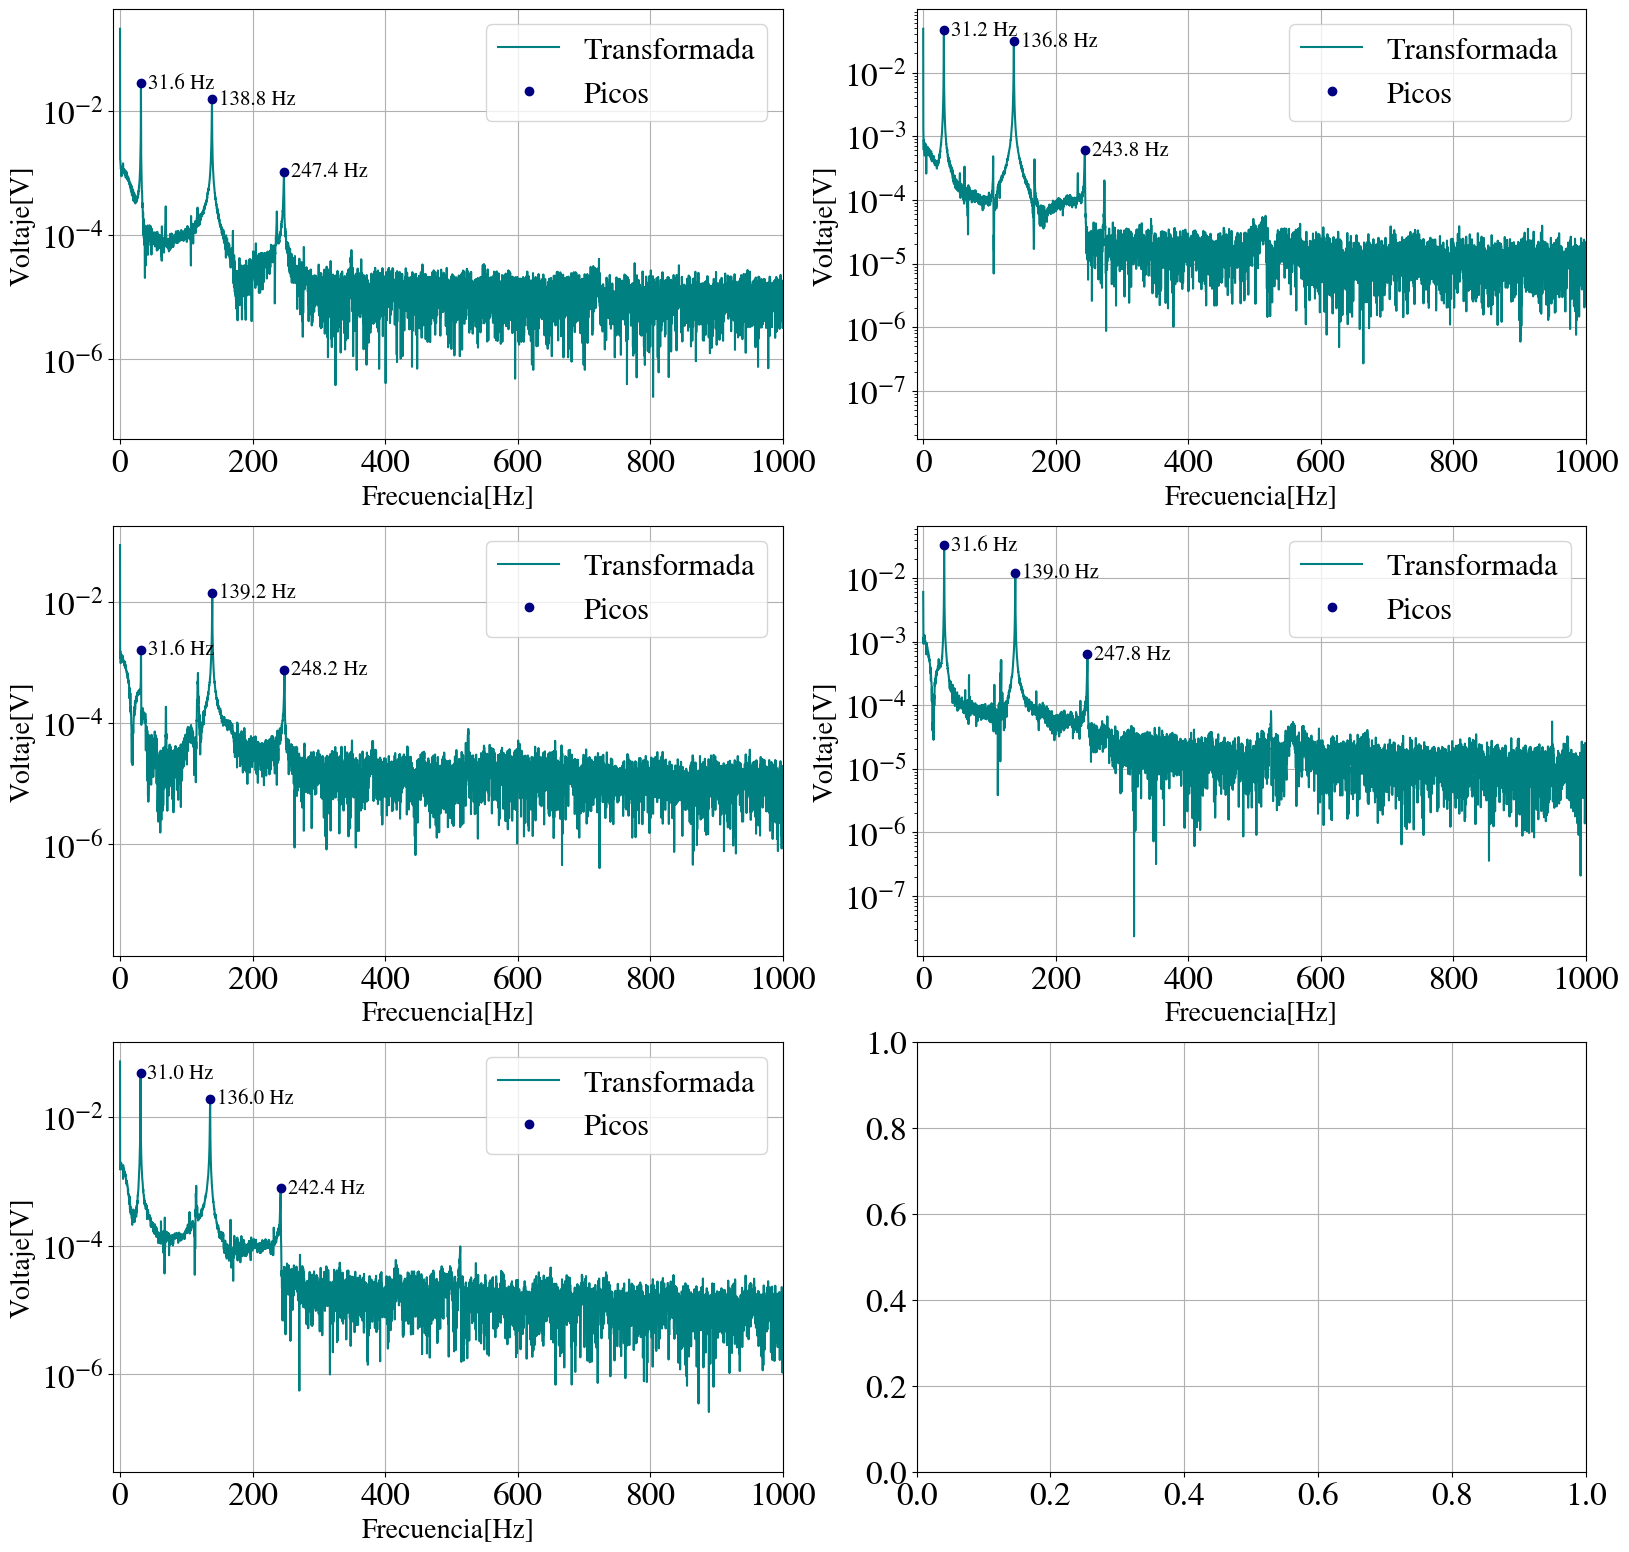

In [ ]:
#Grafico todo junto

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(frec[:N//2], fft[0][:N//2], color = 'teal', label = 'Transformada')
axs[0,0].plot(frec[picos[0]], fft[0][picos[0]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Frecuencia[Hz]')
axs[0,0].set_xlim(-10,1000)
axs[0,0].set_yscale('log')
axs[0,0].legend()
for f, a in zip(frec[picos[0]], fft[0][picos[0]]):
    axs[0,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)


axs[0,1].plot(frec[:N//2], fft[1][:N//2], color = 'teal', label = 'Transformada')
axs[0,1].plot(frec[picos[1]], fft[1][picos[1]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Frecuencia[Hz]')
axs[0,1].set_xlim(-10,1000)
axs[0,1].set_yscale('log')
axs[0,1].legend()
for f, a in zip(frec[picos[1]], fft[1][picos[1]]):
    axs[0,1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,0].plot(frec[:N//2], fft[2][:N//2], color = 'teal', label = 'Transformada')
axs[1,0].plot(frec[picos[2]], fft[2][picos[2]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Frecuencia[Hz]')
axs[1,0].set_xlim(-10,1000)
axs[1,0].set_yscale('log')
axs[1,0].legend()
for f, a in zip(frec[picos[2]], fft[2][picos[2]]):
    axs[1,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,1].plot(frec[:N//2], fft[3][:N//2], color = 'teal', label = 'Transformada')
axs[1,1].plot(frec[picos[3]], fft[3][picos[3]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Frecuencia[Hz]')
axs[1,1].set_xlim(-10,1000)
axs[1,1].set_yscale('log')
axs[1,1].legend()
for f, a in zip(frec[picos[3]], fft[3][picos[3]]):
    axs[1,1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[2,0].plot(frec[:N//2], fft[4][:N//2], color = 'teal', label = 'Transformada')
axs[2,0].plot(frec[picos[4]], fft[4][picos[4]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Frecuencia[Hz]')
axs[2,0].set_xlim(-10,1000)
axs[2,0].set_yscale('log')
axs[2,0].legend()
for f, a in zip(frec[picos[4]], fft[4][picos[4]]):
    axs[2,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

plt.show()

In [ ]:
print(frec_picos)

[array([ 31.6, 138.8, 247.4]), array([ 31.2, 136.8, 243.8]), array([ 31.6, 139.2, 248.2]), array([ 31.6, 139. , 247.8]), array([ 31. , 136. , 242.4])]


In [ ]:
32*((4.694091/1.875104)**2)

200.54058016019414

In [ ]:
32*8

256

# Decaimiento

In [ ]:
def exponencial(x,a,b,c,d):
    return a*np.exp((x-c)*b)+d

def exp_neg(x,a,b,c,d):
    return -a*np.exp(-(x-c)*b)+d

def chi2_red(x, y, f_ajuste, err_y, params):
  n_datos = y.size
  n_params = len(params)
  residuos = y - f_ajuste(x, *params)
  nu =  (n_datos - n_params) #Grados de Libertad
  chi2_val = sum((residuos / err_y) ** 2)
  chi2_red = chi2_val/nu
  p_valor = chi2.sf(chi2_val, df = nu)
  return chi2_val, chi2_red, nu, p_valor

-0.6301018415553306


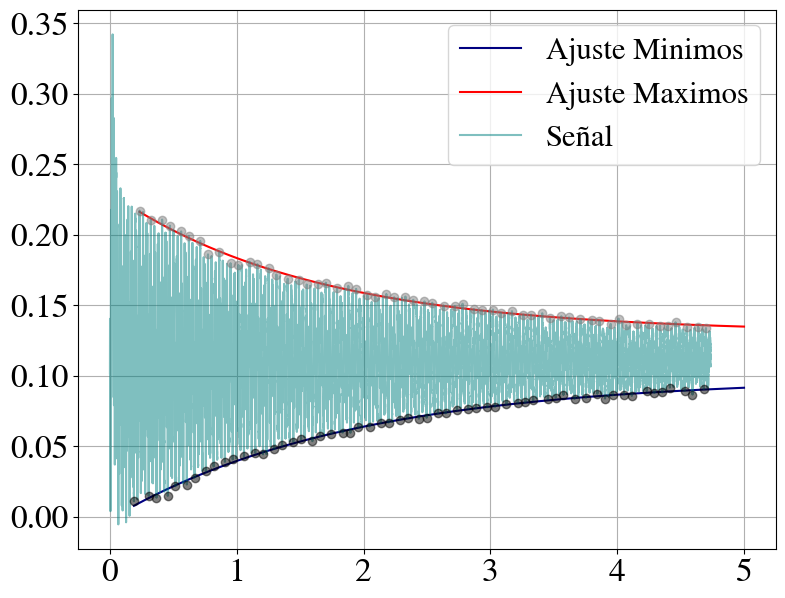

55


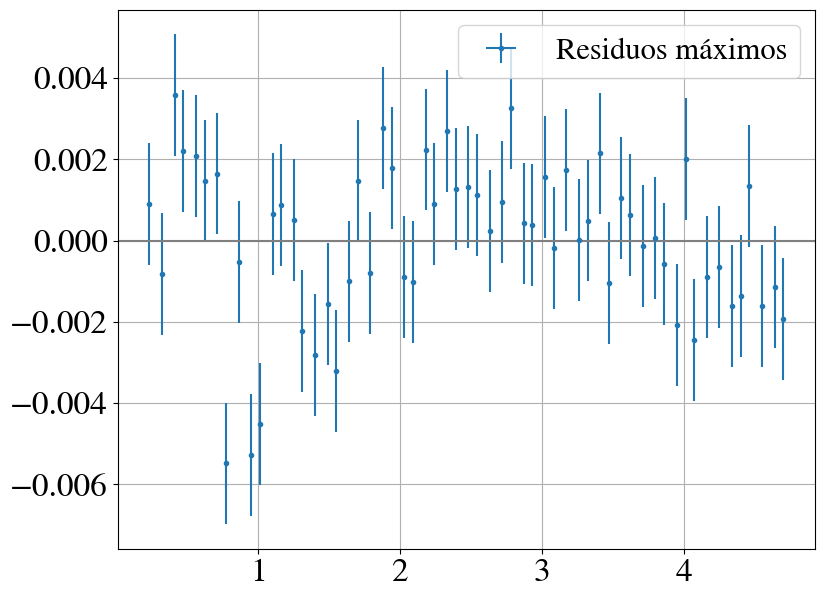

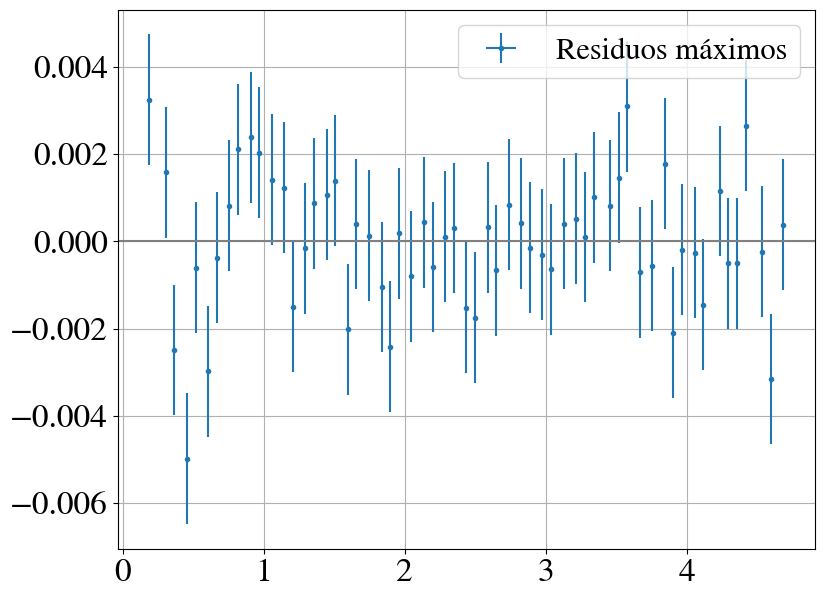

-0.6093097217579695


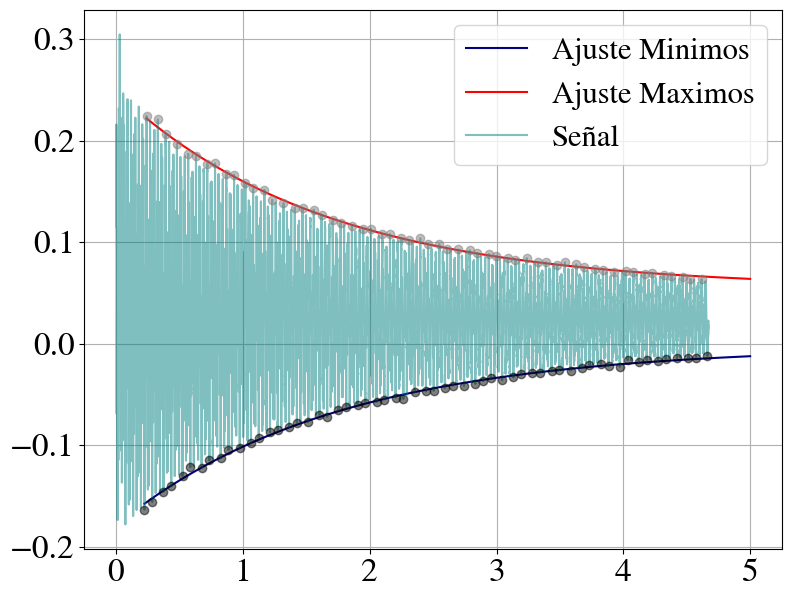

55


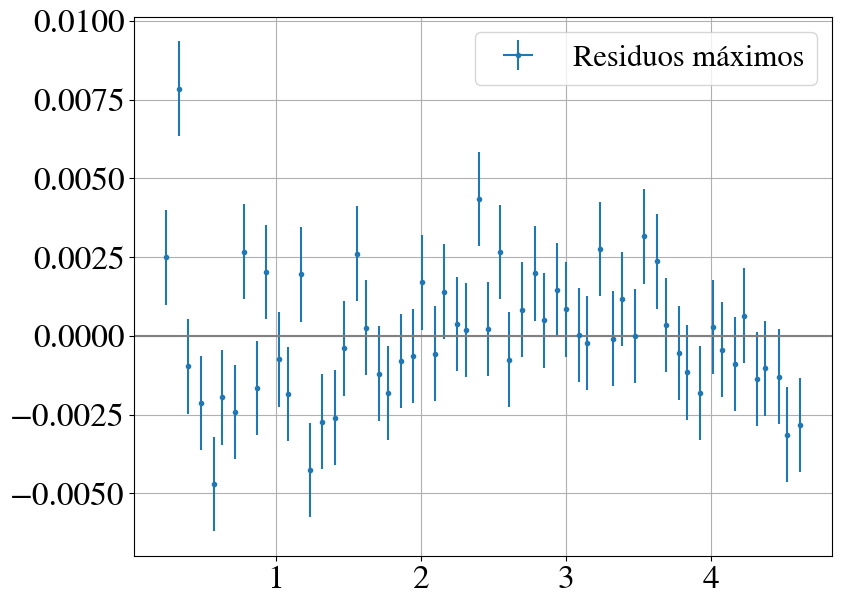

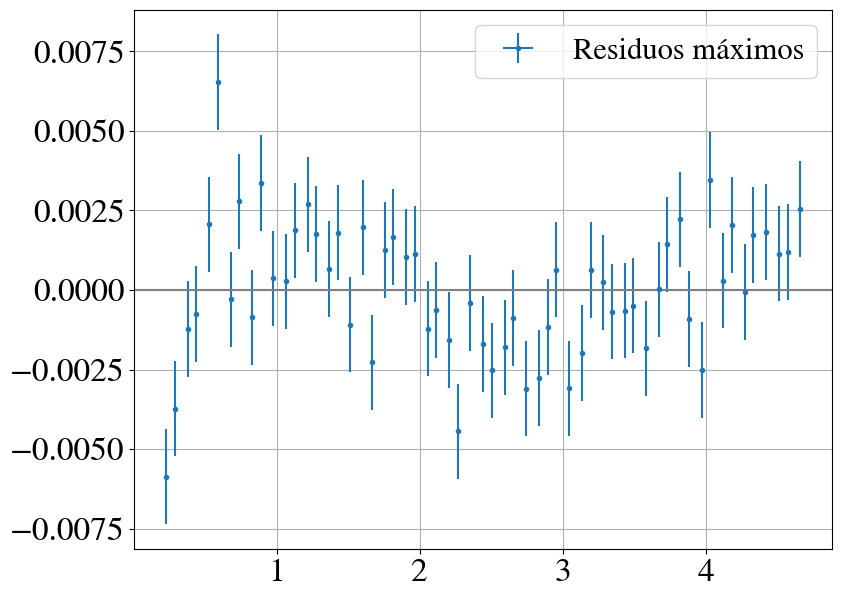

-0.6727260235106259


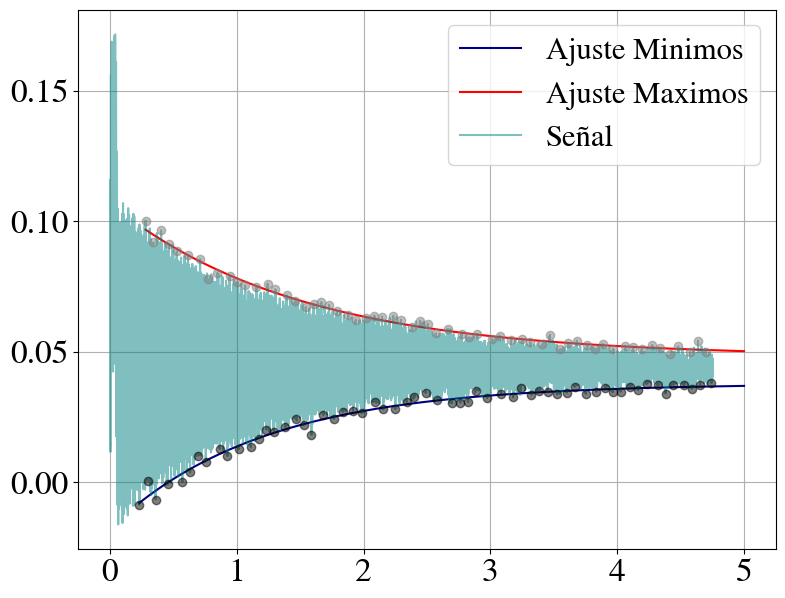

56


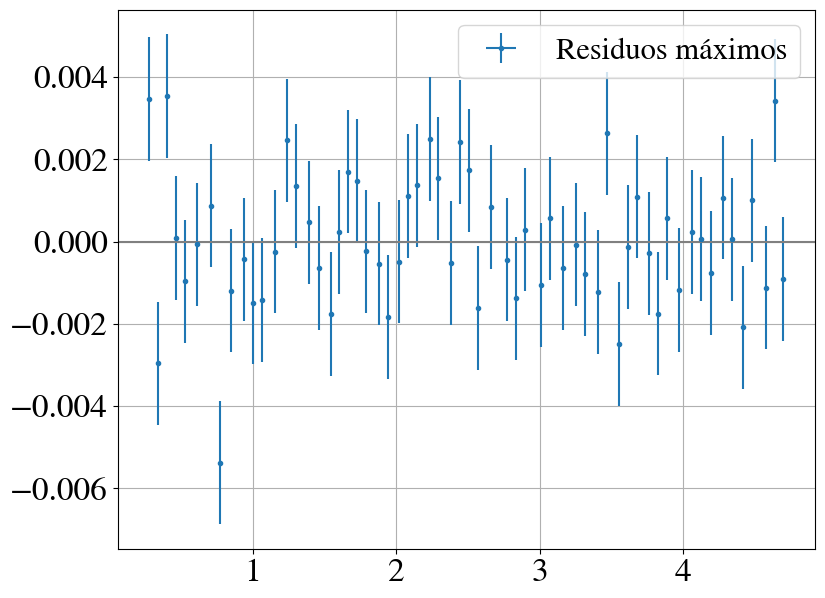

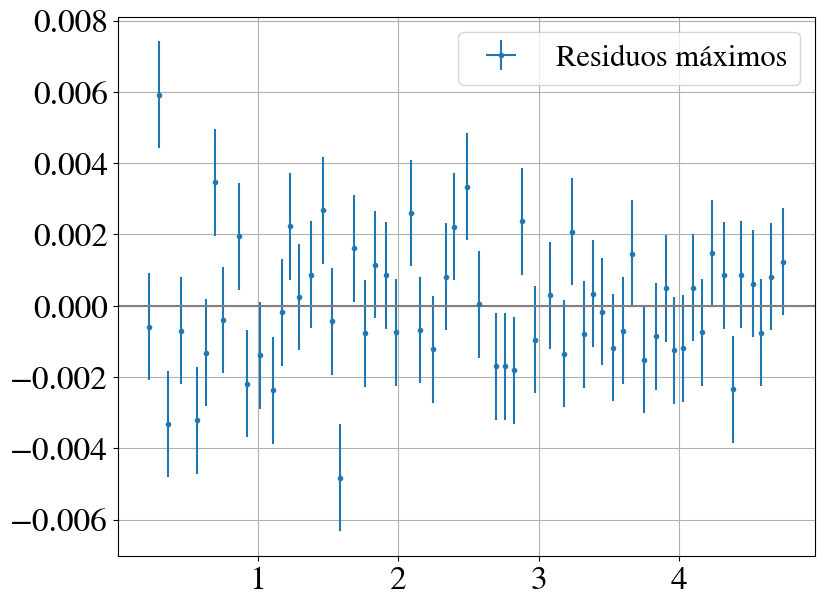

-0.46633325193070335


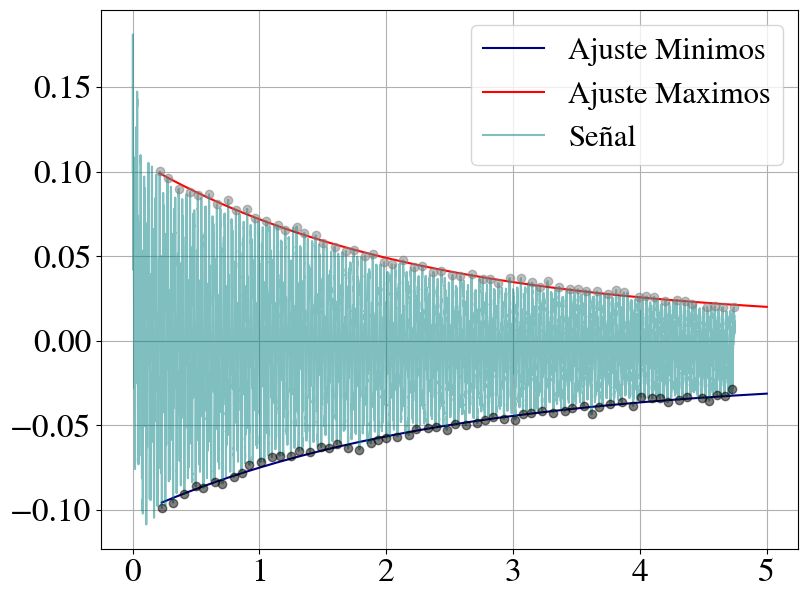

56


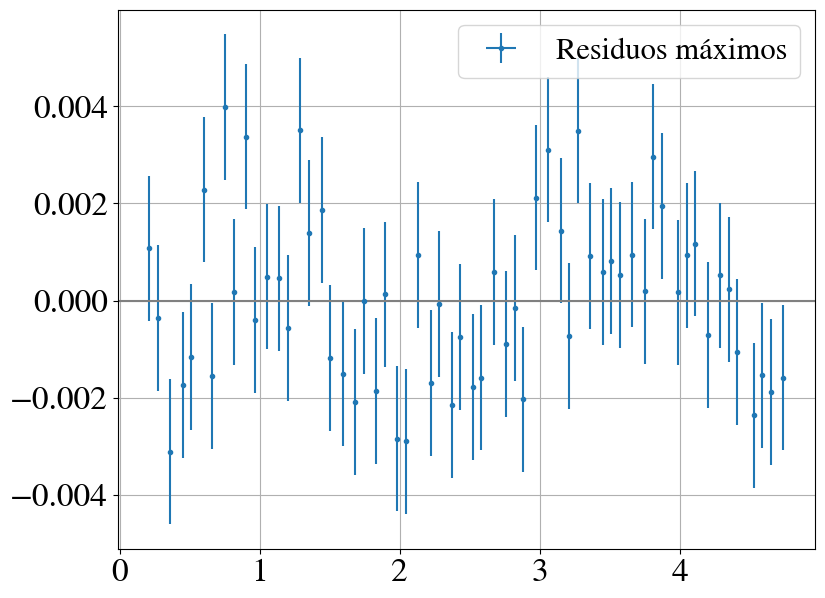

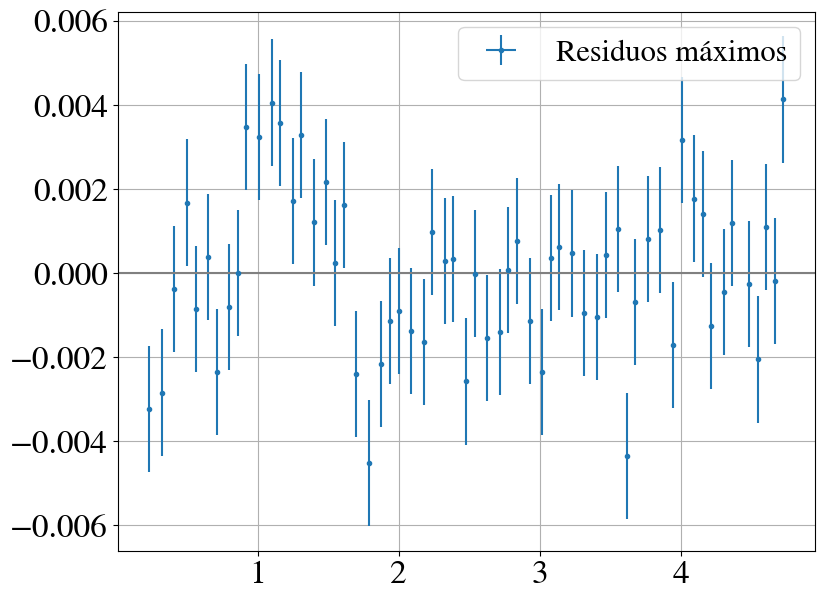

-0.5232357621523284


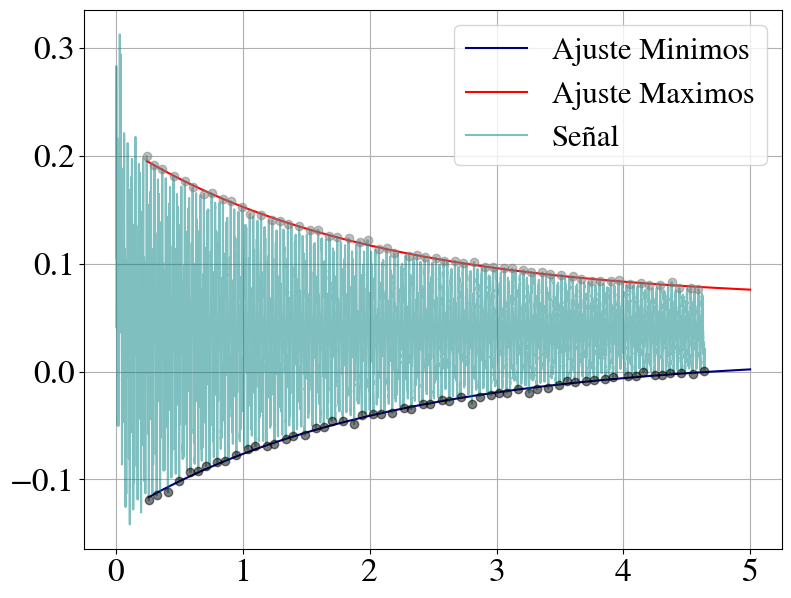

54


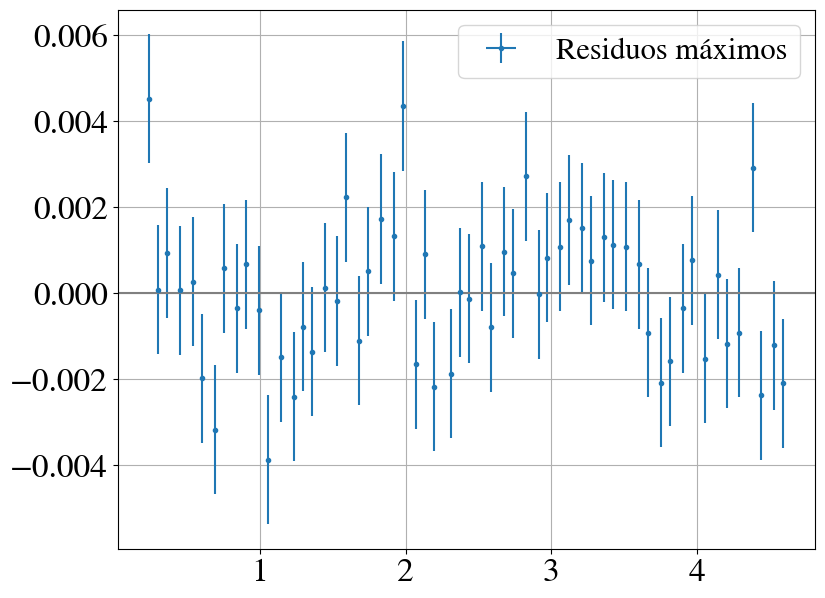

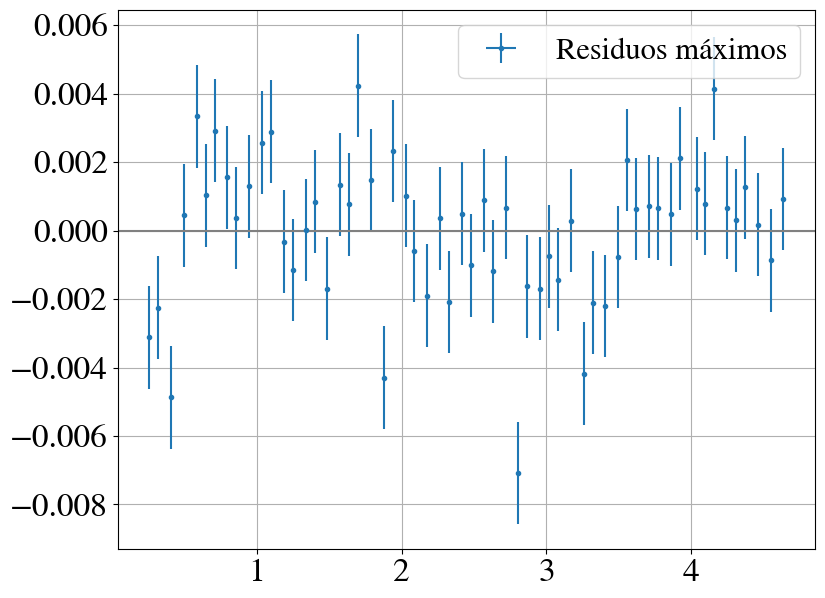

In [ ]:
maximos = []
minimos = []
t_maximos = []
t_minimos = []

coef_min = []
ampl_min = []
t_ini_min = []
ordenada_min = []


coef_max = []
ampl_max = []
t_ini_max = []
ordenada_max = []

err_coef_max = []
err_coef_min = []


chi2_red_min = []
chi2_red_max = []
p_valor_max = []
p_valor_min = []


res_max = []
res_min = []


err_max = []
err_min = []
err_t_max = []
err_t_min = []

for i in range(5):

    #maximos
    picos_voltaje, diccionario_voltaje = find_peaks(voltaje[i], height = 0, distance = 600)

    peak_voltage_values = voltaje[i].iloc[picos_voltaje[3:]]
    t_max = tiempo[i].iloc[picos_voltaje[3:]]

    maximos.append(peak_voltage_values)
    suave_max = np.linspace(t_max.iloc[0], 5, 5000)

    max_err = np.array([0.0015]*len(peak_voltage_values))
    t_max_err = np.array([5*10**(-9)]*len(peak_voltage_values))

    #minimos
    picos_voltaje_min, diccionario_voltaje_min = find_peaks(-voltaje[i], height = -0.1, distance = 600)

    min_volt = voltaje[i].iloc[picos_voltaje_min[3:]]
    t_min = tiempo[i].iloc[picos_voltaje_min[3:]]

    minimos.append(min_volt)
    suave_min = np.linspace(t_min.iloc[0], 5, 5000)

    min_err = np.array([0.0015]*len(min_volt))
    t_min_err = np.array([5*10**(-9)]*len(min_volt))

    err_min.append(min_err)
    err_t_min.append(t_min_err)

    err_max.append(max_err)
    err_t_max.append(t_max_err)



    #ajustes

    if i ==0:
        p_ini_max = [0.2, -1, t_max.iloc[0], 0]
        p_ini_min = [0.1, 1, t_min.iloc[0], 0]

    elif i ==2:
        p_ini_max = [0.08, -1, t_max.iloc[0], 0]
        p_ini_min = [-min(min_volt), 1, t_min.iloc[0], 0]

    else:
        p_ini_max = [max(peak_voltage_values), -1, t_max.iloc[0], 0]
        p_ini_min = [-min(min_volt), 1, t_min.iloc[0], 0]

    popt, pcov = curve_fit(exponencial, t_max, peak_voltage_values,  p0 = p_ini_max, sigma = max_err, absolute_sigma = True)
    amplitud, decaimiento, t0, offset = popt
    amplitud_err, decaimiento_err, t0_err, offset_err = np.sqrt(np.diag(pcov))

    print(decaimiento)

    popt_min, pcov_min = curve_fit(exp_neg, t_min, min_volt, p0 = p_ini_min, sigma = min_err, absolute_sigma = True)
    amplitud_min, decaimiento_min, t0_min, offset_min = popt_min
    amplitud_min_err, decaimiento_min_err, t0_min_err, offset_min_err = np.sqrt(np.diag(pcov_min))

    #ploteo
    plt.plot(suave_min, exp_neg(suave_min,amplitud_min, decaimiento_min, t0_min, offset_min), label = 'Ajuste Minimos', color = 'navy')
    plt.plot(suave_max, exponencial(suave_max,amplitud, decaimiento, t0, offset), label = 'Ajuste Maximos', color = 'red')
    plt.plot(tiempo[i], voltaje[i], label = 'Señal', color = 'teal', alpha = 0.5)
    plt.plot(t_min,min_volt, marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
    plt.plot(t_max,peak_voltage_values, marker = 'o', linestyle = '', color = 'gray', alpha = 0.5)
    plt.legend()
    plt.show()


    #appendeo los parámetros
    coef_min.append(decaimiento_min)
    ampl_min.append(amplitud_min)
    err_coef_min.append(decaimiento_min_err)
    t_ini_min.append(t0_min)
    ordenada_min.append(offset_min)
    t_minimos.append(t_min)

    coef_max.append(decaimiento)
    ampl_max.append(amplitud)
    err_coef_max.append(decaimiento_err)
    t_ini_max.append(t0)
    ordenada_max.append(offset)
    t_maximos.append(t_max)


    #calculo parámetros de bondad y appendeo
    chi_min, chi_red_min, gl_min, p_value_min = chi2_red(t_min, min_volt, exp_neg, min_err, popt_min)
    chi_max, chi_red_max, gl_max, p_value_max = chi2_red(t_max, peak_voltage_values, exponencial, max_err, popt)

    chi2_red_min.append(chi_red_min)
    print(gl_min)
    chi2_red_max.append(chi_red_max)

    p_valor_min.append(p_value_min)
    p_valor_max.append(p_value_max)

    #grafico de residuos

    residuos_max = peak_voltage_values-exponencial(t_max, *popt)
    residuos_min = min_volt - exp_neg(t_min, *popt_min)

    res_max.append(residuos_max)
    res_min.append(residuos_min)

    plt.errorbar(t_max, residuos_max, label = 'Residuos máximos', yerr = max_err, xerr = t_max_err, fmt='.')
    plt.axhline(y=0, color = 'gray')
    plt.legend()
    plt.show()

    plt.errorbar(t_min, residuos_min, label = 'Residuos máximos', yerr = min_err, xerr = t_min_err, fmt = '.')
    plt.axhline(y=0, color = 'gray')
    plt.legend()
    plt.show()

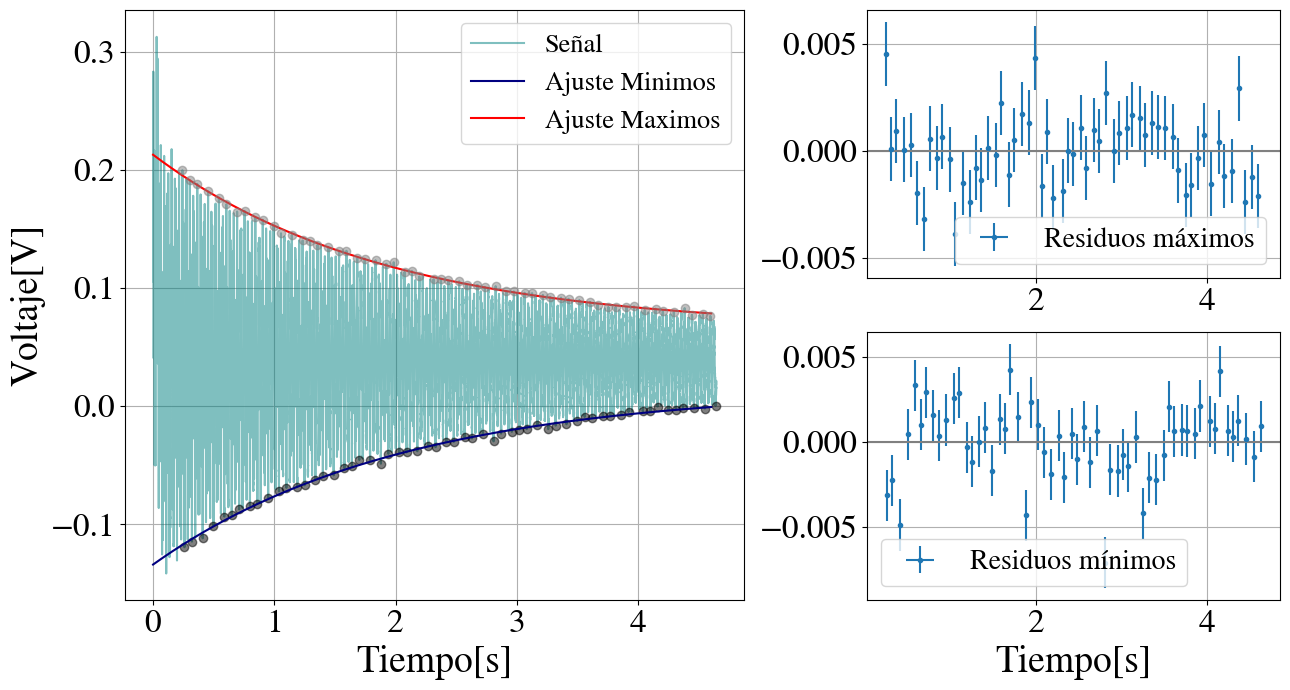

In [ ]:
fig = plt.figure(figsize=(13, 7))  # tamaño de la figura

suave = np.linspace(0,4.6,1000)

# Definir la grilla: 2 filas x 2 columnas
gs = fig.add_gridspec(2, 2, width_ratios=[1.5, 1])

# Subplot grande a la izquierda (ocupa las dos filas de la primera columna)
ax_left = fig.add_subplot(gs[:, 0])
ax_left.plot(tiempo[4], voltaje[4], label = 'Señal', color = 'teal', alpha = 0.5)
ax_left.plot(t_minimos[4],minimos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
ax_left.plot(suave, exp_neg(suave,ampl_min[4], coef_min[4], t_ini_min[4], ordenada_min[4]), label = 'Ajuste Minimos', color = 'navy')
ax_left.plot(suave, exponencial(suave,ampl_max[4], coef_max[4], t_ini_max[4], ordenada_max[4]), label = 'Ajuste Maximos', color = 'red')
ax_left.plot(t_maximos[4],maximos[4], marker = 'o', linestyle = '', color = 'gray', alpha = 0.5)
ax_left.set_xlabel('Tiempo[s]',fontsize = '27')
ax_left.set_ylabel('Voltaje[V]',fontsize = '27')
ax_left.legend(fontsize = '19')


# Arriba a la derecha
ax_top_right = fig.add_subplot(gs[0, 1])

ax_top_right.errorbar(t_maximos[4], res_max[4], label = 'Residuos máximos', yerr = err_max[4], xerr = err_t_max[4], fmt='.')
ax_top_right.axhline(y=0, color = 'gray')
ax_top_right.legend(fontsize = '20')

# Abajo a la derecha
ax_bottom_right = fig.add_subplot(gs[1, 1], sharex=ax_top_right)
ax_bottom_right.errorbar(t_minimos[4], res_min[4], label = 'Residuos mínimos', yerr = err_min[4], xerr = err_t_min[4], fmt='.')
ax_bottom_right.axhline(y=0, color = 'gray')
ax_bottom_right.set_xlabel('Tiempo[s]',fontsize = '27')
ax_bottom_right.legend(fontsize = '20')

plt.tight_layout()
plt.show()

In [ ]:
#Parámetros de bondad


for i in range(5):
    print(f'Para la medición {i} de los máximos se obtuvo un chi cuadrado reducido de {chi2_red_max[i]}')
    print(f'Asociado a pvalue de  {p_valor_max[i]}')
    print(f'Para la medición {i} de los mínimos se obtuvo un chi cuadrado reducido de {chi2_red_min[i]}')
    print(f'Asociado a pvalue de  {p_valor_min[i]}')
    print(f'--------------------------------------------------------------------------')


Para la medición 0 de los máximos se obtuvo un chi cuadrado reducido de 1.8013358990301236
Asociado a pvalue de  0.0002494543916092019
Para la medición 0 de los mínimos se obtuvo un chi cuadrado reducido de 1.1416240373726327
Asociado a pvalue de  0.21971281132315199
--------------------------------------------------------------------------
Para la medición 1 de los máximos se obtuvo un chi cuadrado reducido de 2.182243420379411
Asociado a pvalue de  1.1908916432792987e-06
Para la medición 1 de los mínimos se obtuvo un chi cuadrado reducido de 2.204306723966298
Asociado a pvalue de  6.826076579517749e-07
--------------------------------------------------------------------------
Para la medición 2 de los máximos se obtuvo un chi cuadrado reducido de 1.2548430511698765
Asociado a pvalue de  0.09328248837187837
Para la medición 2 de los mínimos se obtuvo un chi cuadrado reducido de 1.595710225654362
Asociado a pvalue de  0.0030552676756501283
----------------------------------------------

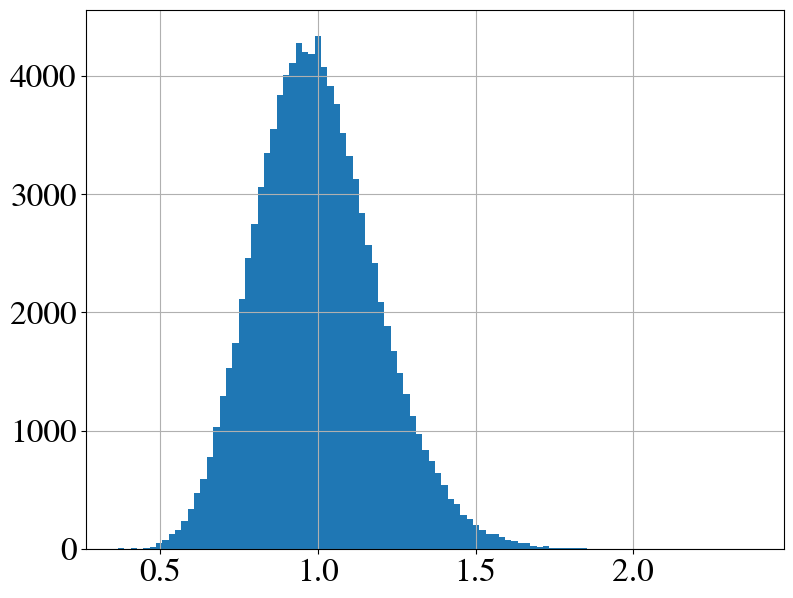

In [ ]:
puntos = np.random.chisquare(df = 54, size = 100000)

plt.hist(puntos/54, bins = 100)
plt.show()

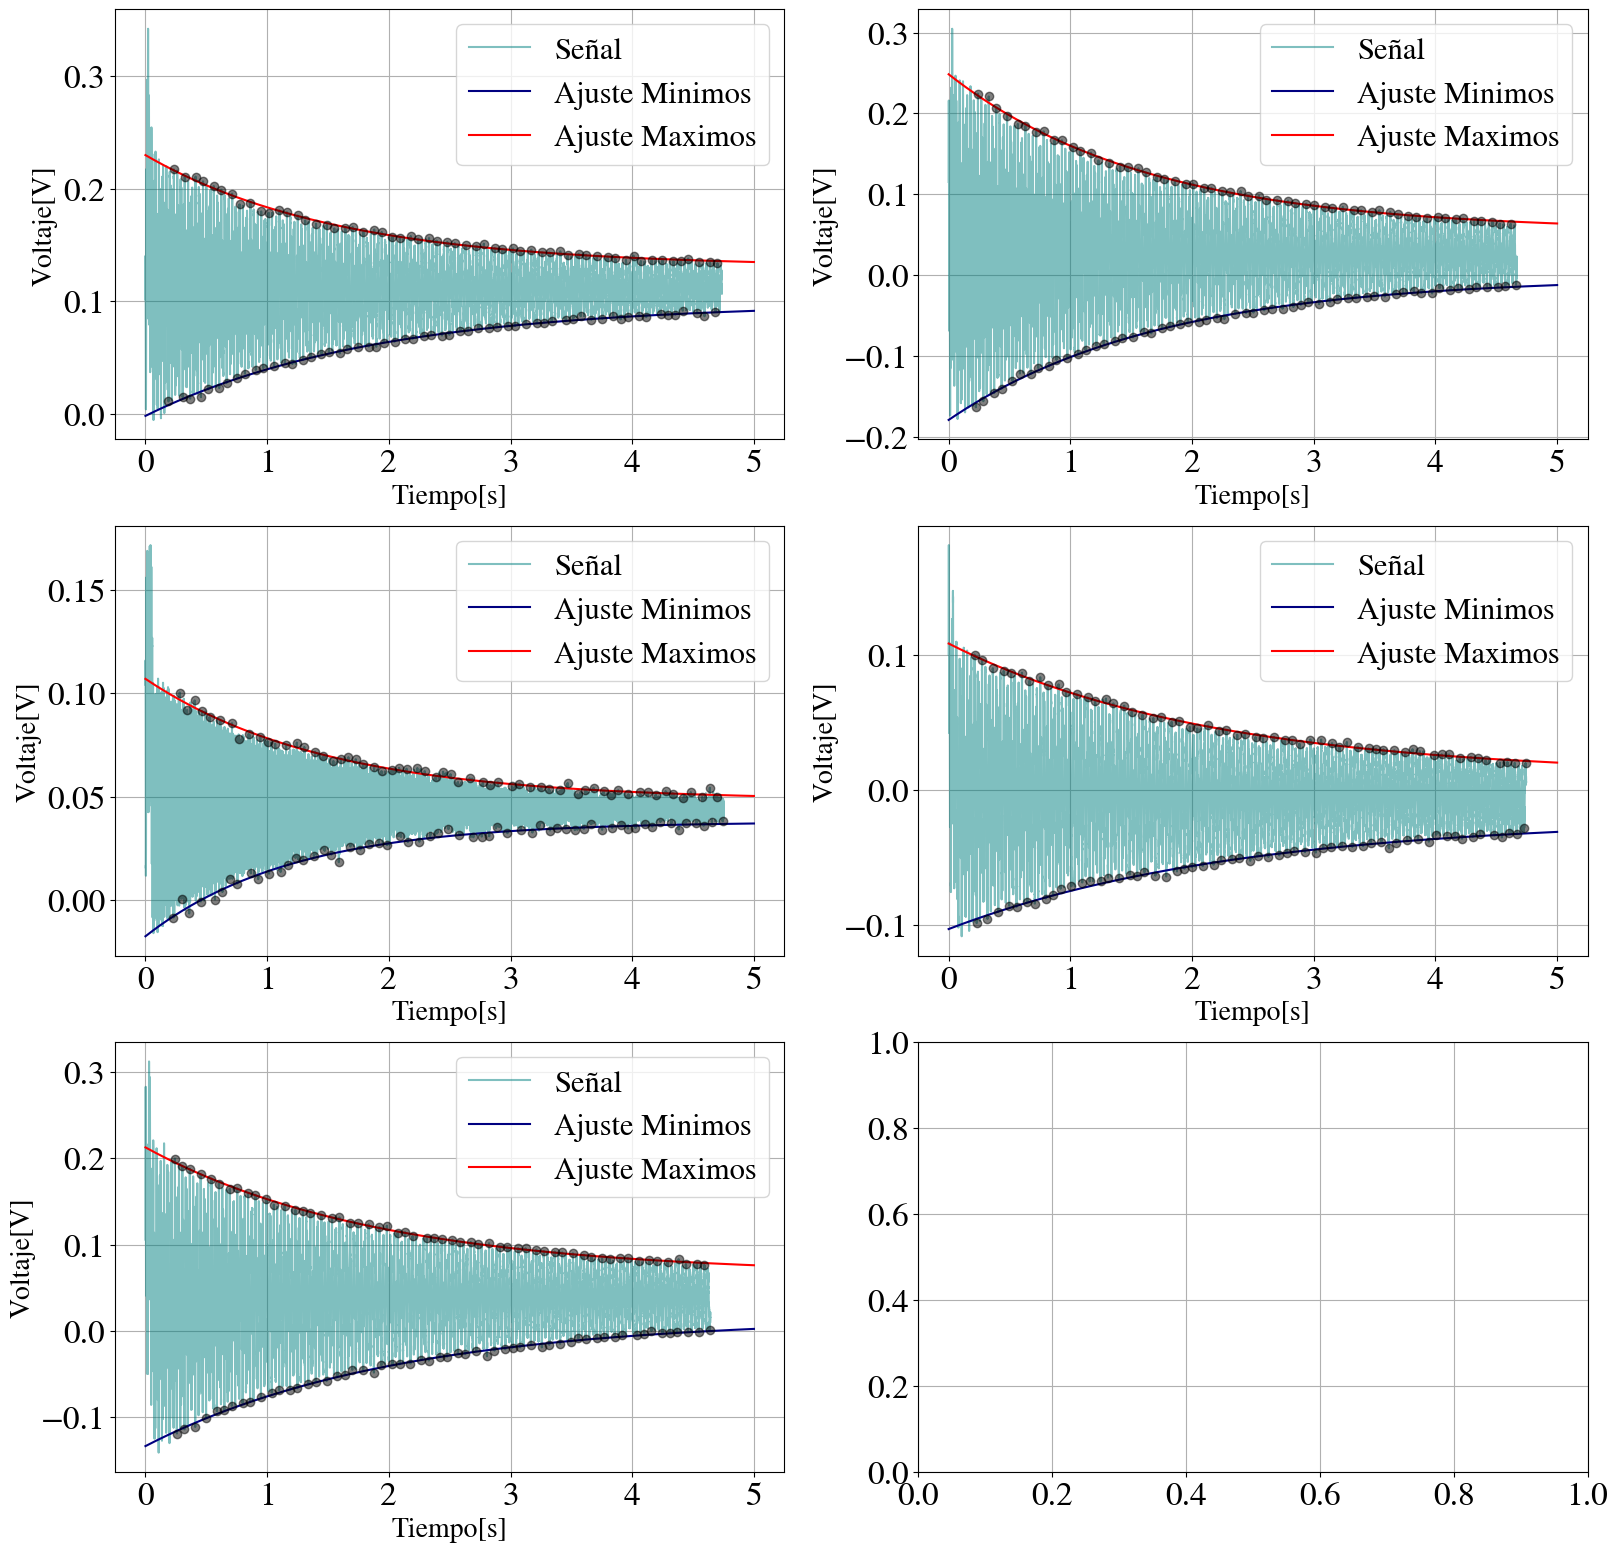

In [ ]:
#Grafico todo junto
suave = np.linspace(0,5,1000)

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(tiempo[0], voltaje[0], color = 'teal', label = 'Señal', alpha = 0.5)
axs[0,0].plot(suave, exp_neg(suave,ampl_min[0], coef_min[0], t_ini_min[0], ordenada_min[0]), label = 'Ajuste Minimos', color = 'navy')
axs[0,0].plot(suave, exponencial(suave,ampl_max[0], coef_max[0], t_ini_max[0], ordenada_max[0]), label = 'Ajuste Maximos', color = 'red')
axs[0,0].plot(t_minimos[0], minimos[0], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,0].plot(t_maximos[0], maximos[0], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].legend()


axs[0,1].plot(tiempo[1], voltaje[1], color = 'teal', label = 'Señal', alpha = 0.5)
axs[0,1].plot(suave, exp_neg(suave,ampl_min[1], coef_min[1], t_ini_min[1], ordenada_min[1]), label = 'Ajuste Minimos', color = 'navy')
axs[0,1].plot(suave, exponencial(suave,ampl_max[1], coef_max[1], t_ini_max[1], ordenada_max[1]), label = 'Ajuste Maximos', color = 'red')
axs[0,1].plot(t_minimos[1], minimos[1], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,1].plot(t_maximos[1], maximos[1], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
axs[0,1].legend()

axs[1,0].plot(tiempo[2], voltaje[2], color = 'teal', label = 'Señal', alpha = 0.5)
axs[1,0].plot(suave, exp_neg(suave,ampl_min[2], coef_min[2], t_ini_min[2], ordenada_min[2]), label = 'Ajuste Minimos', color = 'navy')
axs[1,0].plot(suave, exponencial(suave,ampl_max[2], coef_max[2], t_ini_max[2], ordenada_max[2]), label = 'Ajuste Maximos', color = 'red')
axs[1,0].plot(t_minimos[2], minimos[2], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,0].plot(t_maximos[2], maximos[2], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
axs[1,0].legend()

axs[1,1].plot(tiempo[3], voltaje[3], color = 'teal', label = 'Señal', alpha = 0.5)
axs[1,1].plot(suave, exp_neg(suave,ampl_min[3], coef_min[3], t_ini_min[3], ordenada_min[3]), label = 'Ajuste Minimos', color = 'navy')
axs[1,1].plot(suave, exponencial(suave,ampl_max[3], coef_max[3], t_ini_max[3], ordenada_max[3]), label = 'Ajuste Maximos', color = 'red')
axs[1,1].plot(t_minimos[3], minimos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,1].plot(t_maximos[3], maximos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
axs[1,1].legend()

axs[2,0].plot(tiempo[4], voltaje[4], color = 'teal', label = 'Señal', alpha = 0.5)
axs[2,0].plot(suave, exp_neg(suave,ampl_min[4], coef_min[4], t_ini_min[4], ordenada_min[4]), label = 'Ajuste Minimos', color = 'navy')
axs[2,0].plot(suave, exponencial(suave,ampl_max[4], coef_max[4], t_ini_max[4], ordenada_max[4]), label = 'Ajuste Maximos', color = 'red')
axs[2,0].plot(t_minimos[4], minimos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[2,0].plot(t_maximos[4], maximos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Tiempo[s]')
axs[2,0].legend()

plt.show()

In [ ]:
print(coef_max)

[np.float64(-0.6301018415553306), np.float64(-0.6093097217579695), np.float64(-0.6727260235106259), np.float64(-0.46633325193070335), np.float64(-0.5232357621523284)]


#Calculo del módulo de Young

In [ ]:
print(frec_picos)

[array([ 31.6, 138.8, 247.4]), array([ 31.2, 136.8, 243.8]), array([ 31.6, 139.2, 248.2]), array([ 31.6, 139. , 247.8]), array([ 31. , 136. , 242.4])]


In [47]:
alfa_max = np.array(coef_max)
err_alfa_max = np.array(err_coef_max)
alfa_min = -np.array(coef_min)
err_alfa_min = np.array(err_coef_min)


frecuencias_fundamental = np.array([sub[0] for sub in frec_picos])
frecuencias_seg = np.array([sub[1] for sub in frec_picos])
frecuencias_ter = np.array([sub[2] for sub in frec_picos])
error_frec = np.array([1/5]*5)

ampl_fun = np.array([sub[0] for sub in fft_picos])
ampl_seg = np.array([sub[1] for sub in fft_picos])
ampl_ter = np.array([sub[2] for sub in fft_picos])


In [ ]:
def dens_lineal(d, rho):
    return rho*np.pi*(d/2)**2
def momento(d):
    return np.pi*(d**4)/64

k1_L = 1.875104
k2_L = 4.694091
k3_L = 7.854757
k4_L = 10.995541

#defino variables con los datos


rho_cobre = 8960
L_cobre = 243*10**(-3)
error_L_cobre = 1*10**(-3)
d_cobre = 5*10**(-3)
error_d_cobre = 0.05*10**(-3)
f1_teorico = 45
err_f = 1/5


def modulo_young(f, I, rho, k, alfa, L):
    E = ((f*2*np.pi)**2 + alfa**2)*((rho*(L**4))/(I*(k**4)))
    return E
def error_modulo_young(e, f, I, rho, k, alfa, L, f_err, I_err, rho_err, alfa_err, L_err):
    return np.sqrt((e**2)*((rho_err/rho)**2 + (4*L_err/L)**2 + (I_err/I)**2) + ((rho*(L**4)/(I*(k**4)))**2)*((4*np.pi*f*f_err)**2 + (2*alfa_err*alfa)**2))

def error_momento(I,d, err_d):
    return 4*I*err_d/d

def error_rho(rho, d, err_d):
    return 2*rho*err_d/d
E_teorico = modulo_young(f1_teorico, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,decaimiento, L_cobre)

err_I= error_momento(momento(d_cobre), d_cobre, error_d_cobre)
err_rho = error_rho(dens_lineal(d_cobre, rho_cobre), d_cobre, error_d_cobre)

E_max = []
E_min = []
E_max_err = []
E_min_err = []

E_max_seg = []
E_max_ter = []

E_max_resta = []
E_max_suma = []

for k in range(len(frecuencias_fundamental)):
    E_max_k = modulo_young(frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_max[k], L_cobre)
    E_min_k = modulo_young(frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_min[k], L_cobre)

    E_max_resta_k = modulo_young((frecuencias_seg[k]-frecuencias_ter[k])/2, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)
    E_max_suma_k = modulo_young((frecuencias_seg[k]+frecuencias_ter[k])/2, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)

    E_max_k_2 = modulo_young(frecuencias_seg[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)
    E_max_k_3 = modulo_young(frecuencias_ter[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)


    E_max_k_err = error_modulo_young(E_max_k, frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_max[k], L_cobre,err_f, err_I, err_rho, err_alfa_max[k], error_L_cobre)
    E_min_k_err = error_modulo_young(E_min_k, frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_min[k], L_cobre,err_f, err_I, err_rho, err_alfa_min[k], error_L_cobre)

    E_max.append(E_max_k)
    E_min.append(E_min_k)
    E_max_err.append(E_max_k_err)
    E_min_err.append(E_min_k_err)
    E_max_seg.append(E_max_k_2)
    E_max_ter.append(E_max_k_3)
    E_max_resta.append(E_max_resta_k)
    E_max_suma.append(E_max_suma_k)


E_max = np.array(E_max)
E_min = np.array(E_min)



print(f'el valor esperado para el modulo de young es {E_teorico*10**(-9):.2f}GPa')

for i in range(5):
    print(f'--------------------------------------------')
    print(f'El valor obtenido para el {i} con máximos es  ({E_max[i]*10**(-9):.3f}+- {E_max_err[i]*10**(-9):.3f})GPa')
    print(f'El valor obtenido para el {i} con mínimos es  ({E_min[i]*10**(-9):.3f}+- {E_min_err[i]*10**(-9):.3f})GPa')
    print(f'--------------------------------------------')


el valor esperado para el modulo de young es 129.30GPa
--------------------------------------------
El valor obtenido para el 0 con máximos es  (63.760+- 3.041)GPa
El valor obtenido para el 0 con mínimos es  (63.760+- 3.041)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 1 con máximos es  (62.156+- 2.965)GPa
El valor obtenido para el 1 con mínimos es  (62.156+- 2.965)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 2 con máximos es  (63.760+- 3.041)GPa
El valor obtenido para el 2 con mínimos es  (63.761+- 3.041)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 3 con máximos es  (63.760+- 3.041)GPa
El valor obtenido para el 3 con mínimos es  (63.760+- 3.041)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 4 

In [ ]:
for i in range(5):
    print(f'--------------------------------------------')
    print(f'El valor obtenido para el {i} con el segundo pico es  {E_max_seg[i]*10**(-9):.3f}')
    print(f'El valor obtenido para el {i} con el tercer pico es  {E_max_ter[i]*10**(-9):.3f}GPa')
    print(f'El valor obtenido para el {i} con la resta del tercero y segundo es  {E_max_resta[i]*10**(-9):.3f}GPa')
    print(f'El valor obtenido para el {i} con la suma del tercero y el segundo  {E_max_suma[i]*10**(-9):.3f}GPa')
    print(f'--------------------------------------------')

--------------------------------------------
El valor obtenido para el 0 con el segundo pico es  31.322
El valor obtenido para el 0 con el tercer pico es  99.510GPa
El valor obtenido para el 0 con la resta del tercero y segundo es  4.794GPa
El valor obtenido para el 0 con la suma del tercero y el segundo  60.622GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 1 con el segundo pico es  30.426
El valor obtenido para el 1 con el tercer pico es  96.635GPa
El valor obtenido para el 1 con la resta del tercero y segundo es  4.653GPa
El valor obtenido para el 1 con la suma del tercero y el segundo  58.877GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 2 con el segundo pico es  31.503
El valor obtenido para el 2 con el tercer pico es  100.154GPa
El valor obtenido para el 2 con la resta del tercero y segundo es  4.829GPa
El valor obtenido para el 2 con la

In [ ]:
print(np.array(E_max_seg)*10**(-9), np.array(E_max_ter)*10**(-9))

[31.32174541 30.42560406 31.50253653 31.4120674  30.07078572] [ 99.50989277  96.63495919 100.15449176  99.8319236   95.52830646]


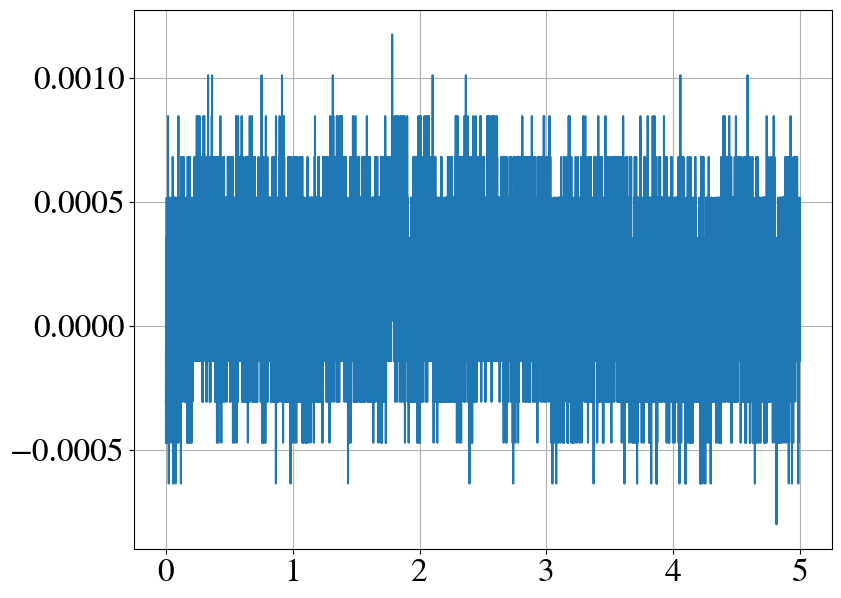

In [ ]:
plt.plot(tiempo_ruido, voltaje_ruido)
plt.show()

#E Final

In [ ]:
E_08 = np.array([61.36208196, 55.1916744,  62.15646076, 63.76010094, 65.38414952, 61.36172112, 55.19122994, 62.15617058, 63.76011299, 65.38459844])
E = np.concatenate((E_max*10**(-9), E_min*10**(-9), E_08))

desv_est = np.sqrt(np.sum((E- np.mean(E))**2)/(len(E)-1))
media = np.mean(E)

print(f'Con un 68% de probabilidad, el módulo de Young pertenece al intervalo ({media:.2f}+- {desv_est:.2f})GPa')

Con un 68% de probabilidad, el módulo de Young pertenece al intervalo (62.27+- 2.72)GPa


#probando cosas

## Probando ver similitudes

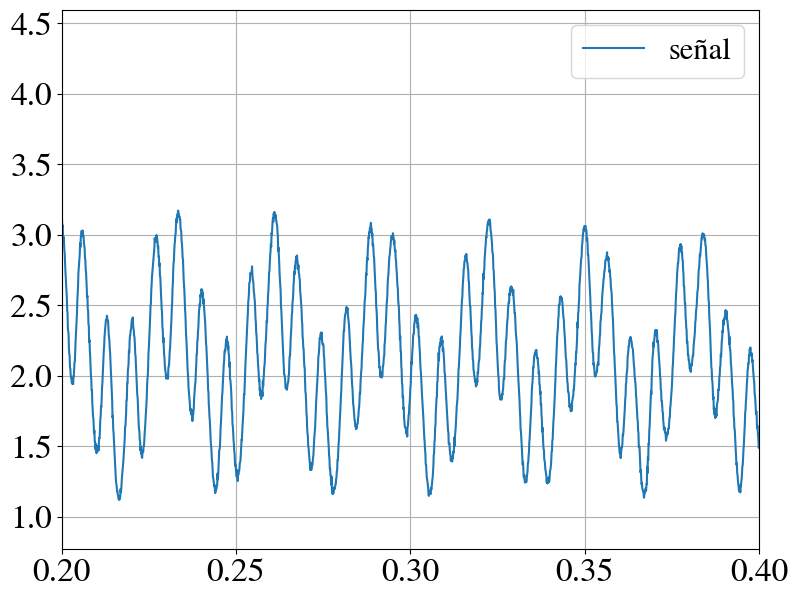

In [33]:
x = np.linspace(0,5, 10000)

f = np.sin((frecuencias_seg[0]-frecuencias_ter[0])*np.pi*x)*np.sin((frecuencias_seg[0]+frecuencias_ter[0])*np.pi*x) #+ np.sin(frecuencias_fundamental[0]*2*np.pi*x)
f_2 = np.sin(54*2*np.pi*x)+np.sin(194*2*np.pi*x)

#plt.plot(x,f, label = 'prueba')
#plt.plot(x, f_2, label = 'prueba suma')
plt.plot(tiempo[0], voltaje[0]*10+1, label = 'señal')
plt.legend()
plt.xlim(0.2,0.4)
plt.show()

In [ ]:
fft_prueba = (2/len(f))*np.abs(np.fft.fft(f))

plt.plot(frec[:len(f)//2], fft_prueba[:len(f)//2])

##a ver si hay una oscilación montada sobre otra

In [38]:
F1_1 = (frecuencias_seg-frecuencias_fundamental)/2
F2 = (frecuencias_fundamental+frecuencias_seg)/2

F1_2 =(frecuencias_ter-frecuencias_seg)/2
F3 = (frecuencias_ter+frecuencias_seg)/2

for i in range(len(frecuencias_fundamental)):
    print(f'primera frecuencia {F1_1[i]}, {F1_2[i]}')
    print(f'segunda frecuencia {F2[i]}')
    print(f'tercera frecuencia {F3[i]}')


primera frecuencia 53.60000000000001, 54.3
segunda frecuencia 85.2
tercera frecuencia 193.10000000000002
primera frecuencia 52.800000000000004, 53.5
segunda frecuencia 84.0
tercera frecuencia 190.3
primera frecuencia 53.80000000000001, 54.5
segunda frecuencia 85.4
tercera frecuencia 193.70000000000002
primera frecuencia 53.7, 54.400000000000006
segunda frecuencia 85.3
tercera frecuencia 193.4
primera frecuencia 52.5, 53.2
segunda frecuencia 83.5
tercera frecuencia 189.2


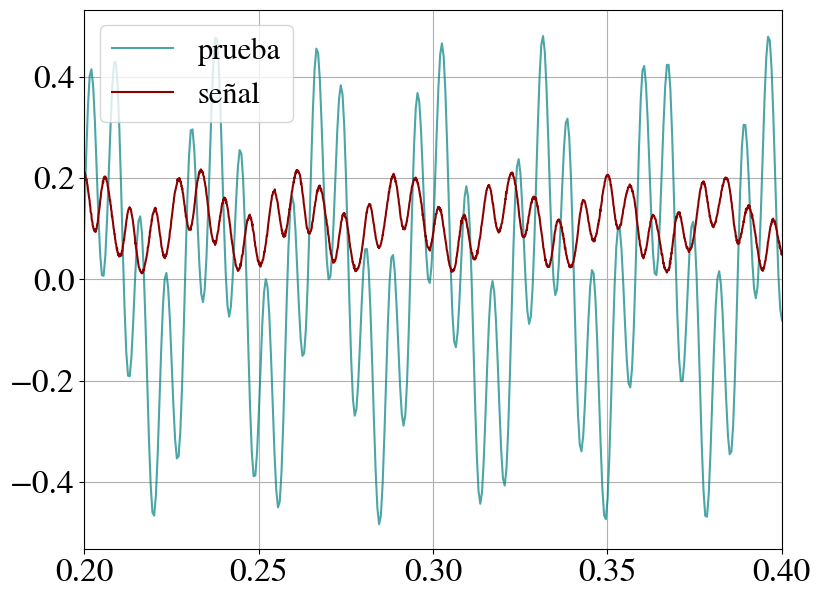

In [56]:
x = np.linspace(0,5, 10000)

f = ampl_seg[0]*np.sin(F1_1[0]*2*np.pi*x)*np.sin(F2[0]*2*np.pi*x)/ampl_fun[0] + ampl_ter[0]*np.sin(F1_2[0]*2*np.pi*x)*np.sin(F3[0]*2*np.pi*x)/ampl_seg[0]


plt.plot(x,f, label = 'prueba', color = 'teal', alpha = 0.7)
#plt.plot(x, f_2, label = 'prueba suma')
plt.plot(tiempo[0], voltaje[0], label = 'señal', color = 'darkred')
plt.legend()
plt.xlim(0.2,0.4)
plt.show()

##probando para ajustar bonito

In [ ]:
p, d = find_peaks(-voltaje[3], height = -0.1, distance = 600)
p_max, d_max = find_peaks(voltaje[3], height = 0, distance = 600)

suave = np.linspace(0,5,2000)

p_0 = [-0.11, 1, tiempo[3].iloc[p[0]], 0] #min(voltaje[3].iloc[p])
p_0_max = [0.2, -1, tiempo[3].iloc[p_max[3]], 0] #max(voltaje[3].iloc[p_max[3:]])


param, err = curve_fit(exp_neg, tiempo[3].iloc[p], voltaje[3].iloc[p], p0 = p_0)
param_max, err_max = curve_fit(exponencial, tiempo[3].iloc[p_max[3:]], voltaje[3].iloc[p_max[3:]], p0 = p_0_max)



plt.plot(tiempo[3], voltaje[3])
plt.plot(tiempo[3].iloc[p], voltaje[3].iloc[p], marker = 'o', linestyle = '')
plt.plot(tiempo[3].iloc[p_max[3:]], voltaje[3].iloc[p_max[3:]], marker = 'o', linestyle = '')
plt.plot(suave, exp_neg(suave, *param))
plt.plot(suave, exponencial(suave, *param_max))
plt.show()

print(param_max)

In [ ]:
print(ampl_min)
print(coef_min)